In [1]:
!pip install hitran-api

In [1]:
from hapi import *
import matplotlib.pyplot as plt
%matplotlib inline

HAPI version: 1.1.0.9.7
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2017 are now available in HAPI code

           It is free to use HAPI. If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005


In [2]:
# -- create 'data' directory to house database
db_begin('data')

Using data

tmp
                     Lines parsed: 0
H2O
                     Lines parsed: 71142
Atmosphere
                     Lines parsed: 88373
sampletab
                     Lines parsed: 3
O3
                     Lines parsed: 5969
H2O_O2
                     Lines parsed: 71831
O2
                     Lines parsed: 689
N2
                     Lines parsed: 78
CO2
                     Lines parsed: 3812
everything
                     Lines parsed: 266074


In [4]:
getHelp(ISO_ID)

The dictionary "ISO_ID" contains information on "global" IDs of isotopologues in HITRAN

   id            M    I                    iso_name       abundance       mass        mol_name
    1     :      1    1                     H2(16O)    0.9973170000  18.010565             H2O
    2     :      1    2                     H2(18O)    0.0019998300  20.014811             H2O
    3     :      1    3                     H2(17O)    0.0003720000  19.014780             H2O
    4     :      1    4                     HD(16O)    0.0003106900  19.016740             H2O
    5     :      1    5                     HD(18O)    0.0000006230  21.020985             H2O
    6     :      1    6                     HD(17O)    0.0000001160  20.020956             H2O
  129     :      1    7                     D2(16O)    0.0000000242  20.022915             H2O
    7     :      2    1                 (12C)(16O)2    0.9842040000  43.989830             CO2
    8     :      2    2                 (13C)(16O)2    0

In [5]:
ISO_ID

{1: [1, 1, 'H2(16O)', 0.997317, 18.010565, 'H2O'],
 2: [1, 2, 'H2(18O)', 0.00199983, 20.014811, 'H2O'],
 3: [1, 3, 'H2(17O)', 0.000372, 19.01478, 'H2O'],
 4: [1, 4, 'HD(16O)', 0.00031069, 19.01674, 'H2O'],
 5: [1, 5, 'HD(18O)', 6.23e-07, 21.020985, 'H2O'],
 6: [1, 6, 'HD(17O)', 1.16e-07, 20.020956, 'H2O'],
 129: [1, 7, 'D2(16O)', 2.4197e-08, 20.022915, 'H2O'],
 7: [2, 1, '(12C)(16O)2', 0.984204, 43.98983, 'CO2'],
 8: [2, 2, '(13C)(16O)2', 0.011057, 44.993185, 'CO2'],
 9: [2, 3, '(16O)(12C)(18O)', 0.0039471, 45.994076, 'CO2'],
 10: [2, 4, '(16O)(12C)(17O)', 0.000734, 44.994045, 'CO2'],
 11: [2, 5, '(16O)(13C)(18O)', 4.434e-05, 46.997431, 'CO2'],
 12: [2, 6, '(16O)(13C)(17O)', 8.25e-06, 45.9974, 'CO2'],
 13: [2, 7, '(12C)(18O)2', 3.9573e-06, 47.998322, 'CO2'],
 14: [2, 8, '(17O)(12C)(18O)', 1.47e-06, 46.998291, 'CO2'],
 121: [2, 9, '(12C)(17O)2', 1.368e-07, 45.998262, 'CO2'],
 15: [2, 10, '(13C)(18O)2', 4.4967e-08, 49.001675, 'CO2'],
 120: [2, 11, '(18O)(13C)(17O)', 1.654e-08, 48.00165, 

In [6]:
print(sorted(ISO_ID.keys()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 129]


# Need the following gases:
### N2 -- M=22, I=[1,2], global ID = [69,118]
### O2 -- M=7, I=[1-3], global ID = [36-38]
### Ar -- xx
### CO2 -- M=2, I=[1-12], global ID = [7-14,121,15,120,122]
### H2O  -- M=1, I=[1-7], global ID = [1-6,129]
### Ne -- xx
### He -- xx
### CH4 -- M=6, I=[1-4], global ID = [32-35]
### Kr -- xx
### H2 -- M=45, I=[1,2], global ID = [103,115]
### N2O -- M=4, I=[1-5], global ID = [21-25]
### Xe -- xx
### O3 -- M=3, I=[1-5], global ID = [16-20]
### NO2 -- M=10, I=[1,2], global ID = [44,130]

In [3]:
## -- cm-1= 10,000,000/µm 
nu_min = 10000/13 #13microns in wavenumber
nu_max = 10000/7.5  #7.5microns in wavenumber

print(nu_min, nu_max)

769.2307692307693 1333.3333333333333


In [4]:
atmo_IDs = [69, 36, 7, 1, 32, 103, 21, 16, 44]
fetch_by_ids('AtmoLWIR', atmo_IDs, nu_min, nu_max)


Data is fetched from http://hitran.org

BEGIN DOWNLOAD: AtmoLWIR
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 by

  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/AtmoLWIR.data
  65536 bytes written to data/At

In [6]:
describeTable('AtmoLWIR')

-----------------------------------------
AtmoLWIR summary:
-----------------------------------------
Comment: 
Contains lines for (14N)2,(16O)2,(12C)(16O)2,H2(16O),(12C)H4,H2,(14N)2(16O),(16O)3,(14N)(16O)2
 in 769.231-1333.333 wavenumber range
Number of rows: 112800
Table type: column-fixed
-----------------------------------------
            PAR_NAME           PAR_FORMAT

            molec_id                  %2d
        local_iso_id                  %1d
                  nu               %12.6f
                  sw               %10.3E
                   a               %10.3E
           gamma_air                %5.4f
          gamma_self                %5.3f
              elower               %10.4f
               n_air                %4.2f
           delta_air                %8.6f
 global_upper_quanta                 %15s
 global_lower_quanta                 %15s
  local_upper_quanta                 %15s
  local_lower_quanta                 %15s
                ierr              

N2 0
O2 0
CO2 10978
H2O 2371
CH4 16593
H2 59
N2O 4627
O3 59483
NO2 18689


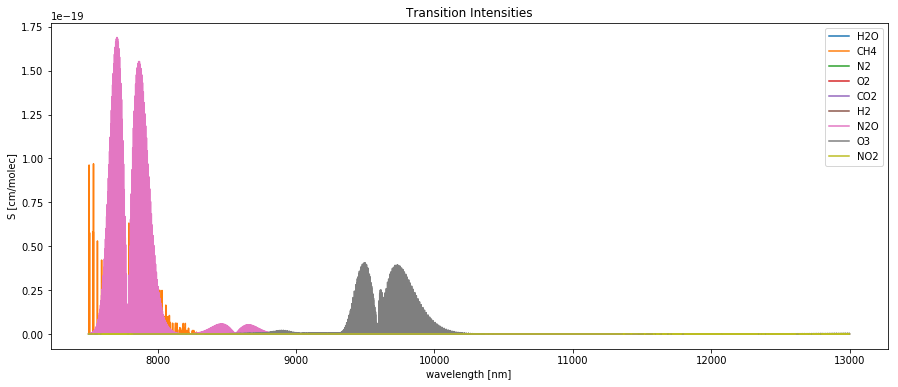

In [49]:
molID, nu, sw = getColumns('AtmoLWIR', ['molec_id', 'nu', 'sw'])

N2 = np.where(molID==22)
print('N2', len(nu[N2]))
O2 = np.where(molID==7)
print('O2', len(nu[O2]))
CO2 = np.where(molID==2)
print('CO2', len(nu[CO2]))
H2O = np.where(molID==1)
print('H2O', len(nu[H2O]))
CH4 = np.where(molID==6)
print('CH4', len(nu[CH4]))
H2 = np.where(molID==45)
print('H2', len(nu[H2]))
N2O = np.where(molID==4)
print('N2O', len(nu[N2O]))
O3 = np.where(molID==3)
print('O3', len(nu[O3]))
NO2 = np.where(molID==10)
print('NO2', len(nu[NO2]))

fig = plt.subplots(figsize=(15,6))
plt.plot(10000000/nu[H2O], sw[H2O], label='H2O')
plt.plot(10000000/nu[CH4], sw[CH4], label='CH4')
plt.plot(10000000/nu[N2], sw[N2], label='N2')
plt.plot(10000000/nu[O2], sw[O2], label='O2')
plt.plot(10000000/nu[CO2], sw[CO2], label='CO2')
plt.plot(10000000/nu[H2], sw[H2], label='H2')
plt.plot(10000000/nu[N2O], sw[N2O], label='N2O')
plt.plot(10000000/nu[O3], sw[O3], label='O3')
plt.plot(10000000/nu[NO2], sw[NO2], label='NO2')
plt.xlabel('wavelength [nm]')
plt.ylabel('S [cm/molec]')
plt.title('Transition Intensities')
plt.legend(loc='upper right')
plt.show()

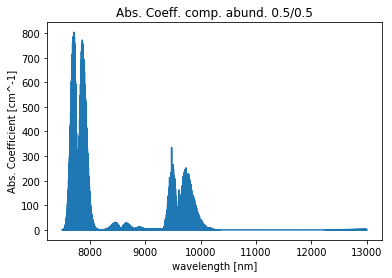

In [27]:
nu, coef = absorptionCoefficient_Doppler(Components=[(3,1,0.5),(4,1,0.5)], SourceTables=['AtmoLWIR'], 
                                         HITRAN_units=False, WavenumberStep=0.001)
plt.plot(10000000/nu, coef)
plt.xlabel('wavelength [nm]')
plt.ylabel('Abs. Coefficient [cm^-1]')
plt.title('Abs. Coeff. comp. abund. 0.5/0.5')
plt.show()

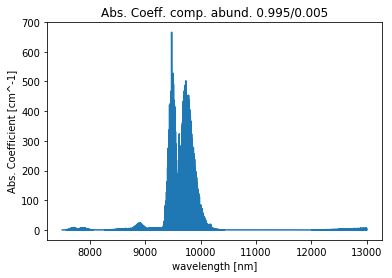

In [26]:
nu, coef = absorptionCoefficient_Doppler(Components=[(3,1,0.995),(4,1,0.005)], SourceTables=['AtmoLWIR'], 
                                         HITRAN_units=False, WavenumberStep=0.001)
plt.plot(10000000/nu, coef)
plt.xlabel('wavelength [nm]')
plt.ylabel('Abs. Coefficient [cm^-1]')
plt.title('Abs. Coeff. comp. abund. 0.995/0.005')
plt.show()

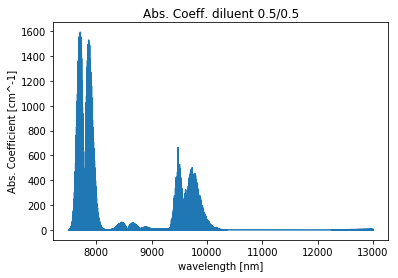

In [30]:
nu, coef = absorptionCoefficient_Doppler(Components=[(3,1),(4,1)], SourceTables=['AtmoLWIR'], 
                                         HITRAN_units=False, Diluent={'O3':0.5, 'N2O':0.5}, WavenumberStep=0.001)
plt.plot(10000000/nu, coef)
plt.xlabel('wavelength [nm]')
plt.ylabel('Abs. Coefficient [cm^-1]')
plt.title('Abs. Coeff. diluent 0.5/0.5')
plt.show()

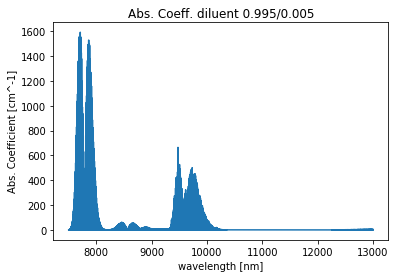

In [31]:
nu, coef = absorptionCoefficient_Doppler(Components=[(3,1),(4,1)], SourceTables=['AtmoLWIR'], 
                                         HITRAN_units=False, Diluent={'O3':0.995, 'N2O':0.005}, WavenumberStep=0.001)
plt.plot(10000000/nu, coef)
plt.xlabel('wavelength [nm]')
plt.ylabel('Abs. Coefficient [cm^-1]')
plt.title('Abs. Coeff. diluent 0.995/0.005')
plt.show()

In [51]:
N2_c = 78.084/100
O2_c = 20.946/100
CO2_c = 0.0375/100
H2O_c = 0.93/100
CH4_c = 1.8*0.0001/100
H2_c = 0.5*0.0001/100
N2O_c = 0.5*0.0001/100
O3_c = 0.03*0.0001/100
NO2_c = 0.02*0.0001/100
print(N2_c+O2_c+CO2_c+H2O_c+CH4_c+H2_c+N2O_c+O3_c+NO2_c)

N2 = (22, 1, N2_c)
O2 = (7, 1, O2_c)
CO2 = (2, 1, CO2_c)
H2O = (1, 1, H2O_c)
CH4 = (6, 1, CH4_c)
H2 = (45, 1, H2_c)
N2O = (4, 1, N2O_c)
O3 = (3, 1, O3_c)
NO2 = (10, 1, NO2_c)

components = [N2, O2, CO2, H2O, CH4, H2, N2O, O3, NO2]

nu, coef = absorptionCoefficient_Doppler(Components=components, SourceTables=['AtmoLWIR'], 
                                         HITRAN_units=False, WavenumberStep=0.001)

0.99997785


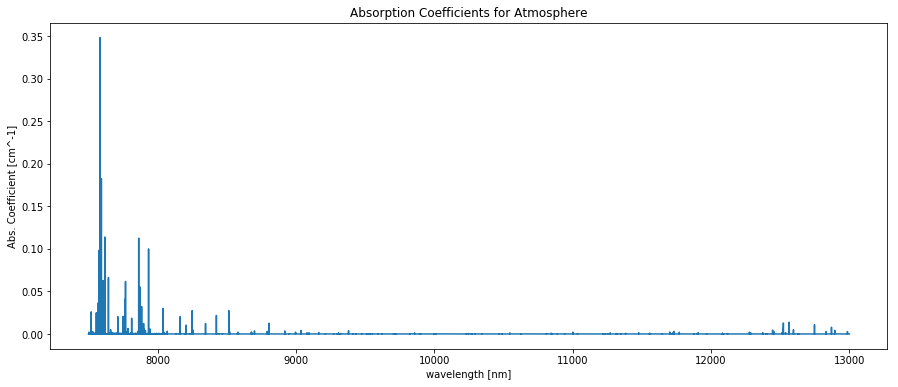

In [52]:
fig = plt.subplots(figsize=(15,6))
plt.plot(10000000/nu, coef)
plt.xlabel('wavelength [nm]')
plt.ylabel('Abs. Coefficient [cm^-1]')
plt.title('Absorption Coefficients for Atmosphere')
plt.show()

In [19]:
getHelp(absorptionSpectrum)

Help on function absorptionSpectrum in module hapi.hapi:

absorptionSpectrum(Omegas, AbsorptionCoefficient, Environment={'l': 100.0}, File=None, Format='%e %e', Wavenumber=None)
    INPUT PARAMETERS: 
        Wavenumber/Omegas:   wavenumber grid                    (required)
        AbsorptionCoefficient:  absorption coefficient on grid  (required)
        Environment:  dictionary containing path length in cm.
                      Default={'l':100.}
        File:         name of the output file                 (optional) 
        Format: c format used in file output, default '%e %e' (optional)
    OUTPUT PARAMETERS: 
        Wavenum: wavenumber grid
        Xsect:  absorption spectrum calculated on the grid
    ---
    DESCRIPTION:
        Calculate an absorption spectrum (dimensionless) based
        on previously calculated absorption coefficient.
        Absorption spectrum is calculated at an arbitrary
        optical path length 'l' (1 m by default)
    ---
    EXAMPLE OF USAGE:


In [37]:
nu1, absorp1 = absorptionSpectrum(nu, coef, Environment={'l':1})
nu100, absorp100 = absorptionSpectrum(nu, coef, Environment={'l':100})
nu10000, absorp10000 = absorptionSpectrum(nu, coef, Environment={'l':10000})
nu100000, absorp100000 = absorptionSpectrum(nu, coef, Environment={'l':100000})

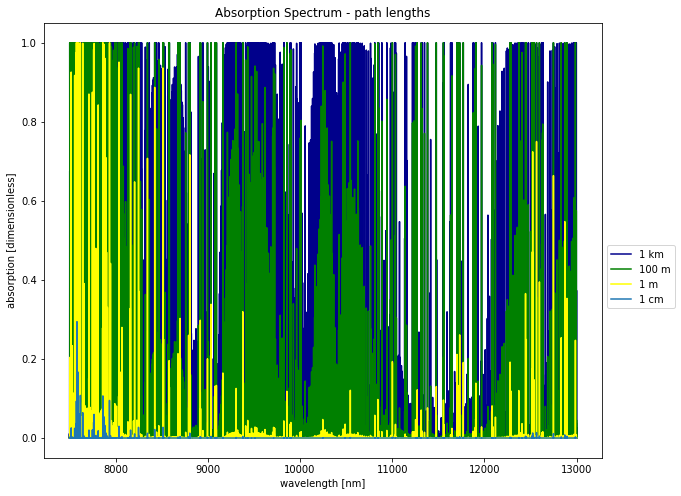

In [54]:
fig = plt.subplots(figsize=(10,8))
plt.plot(10000000/nu100000, absorp100000, label='1 km', color='darkblue')
plt.plot(10000000/nu10000, absorp10000, label='100 m', color='green')
plt.plot(10000000/nu100, absorp100, label='1 m', color='yellow')
plt.plot(10000000/nu1, absorp1, label='1 cm')
plt.xlabel('wavelength [nm]')
plt.ylabel('absorption [dimensionless]')
plt.title('Absorption Spectrum - path lengths')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

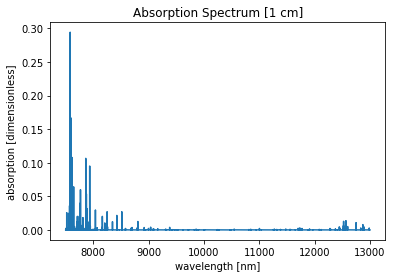

In [53]:
plt.plot(10000000/nu1, absorp1, label='1 cm')
plt.xlabel('wavelength [nm]')
plt.ylabel('absorption [dimensionless]')
plt.title('Absorption Spectrum [1 cm]')
plt.show()

In [30]:
getHelp(SLIT_GAUSSIAN)

Help on function SLIT_GAUSSIAN in module hapi.hapi:

SLIT_GAUSSIAN(x, g)
    Instrumental (slit) function.
    B(x) = sqrt(ln(2)/pi)/γ*exp(-ln(2)*(x/γ)**2),
    where γ/2 is a gaussian half-width at half-maximum.



In [31]:
getHelp(convolveSpectrum)

Help on function convolveSpectrum in module hapi.hapi:

convolveSpectrum(Omega, CrossSection, Resolution=0.1, AF_wing=10.0, SlitFunction=<function SLIT_RECTANGULAR at 0x7fa3c224c620>, Wavenumber=None)
    INPUT PARAMETERS: 
        Wavenumber/Omega:    wavenumber grid                     (required)
        CrossSection:  high-res cross section calculated on grid (required)
        Resolution:    instrumental resolution γ                 (optional)
        AF_wing:       instrumental function wing                (optional)
        SlitFunction:  instrumental function for low-res spectra calculation (optional)
    OUTPUT PARAMETERS: 
        Wavenum: wavenumber grid
        CrossSection: low-res cross section calculated on grid
        i1: lower index in Omega input
        i2: higher index in Omega input
        slit: slit function calculated over grid [-AF_wing; AF_wing]
                with the step equal to instrumental resolution. 
    ---
    DESCRIPTION:
        Produce a simulati

In [44]:
res = (nu_max - nu_min)/128.
nu_, absorp_, i1, i2, slit = convolveSpectrum(nu10000, absorp10000, SlitFunction = SLIT_GAUSSIAN, Resolution = res)

In [45]:
print(len(nu_), len(nu10000))
print(nu_.min(), nu_.max())

544079 564081
779.2321469999999 1323.3101469999997


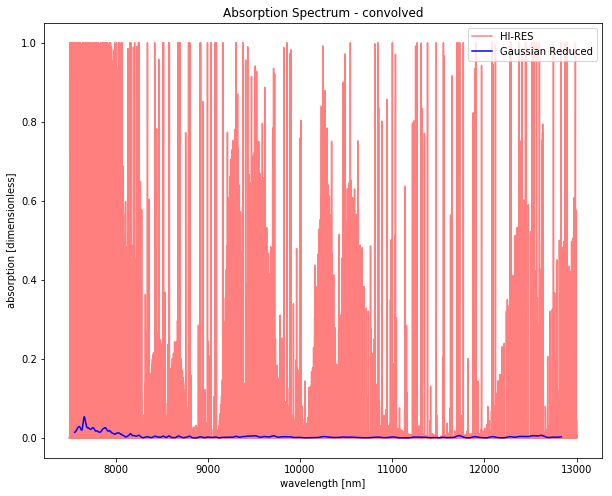

In [55]:
fig = plt.subplots(figsize=(10,8))
plt.plot(10000000/nu10000, absorp10000, color='red', alpha=0.5)
plt.plot(10000000/nu_, absorp_, color='blue')
plt.xlabel('wavelength [nm]')
plt.ylabel('absorption [dimensionless]')
plt.title('Absorption Spectrum - convolved')
plt.legend(['HI-RES','Gaussian Reduced'], loc='upper right')
plt.show()

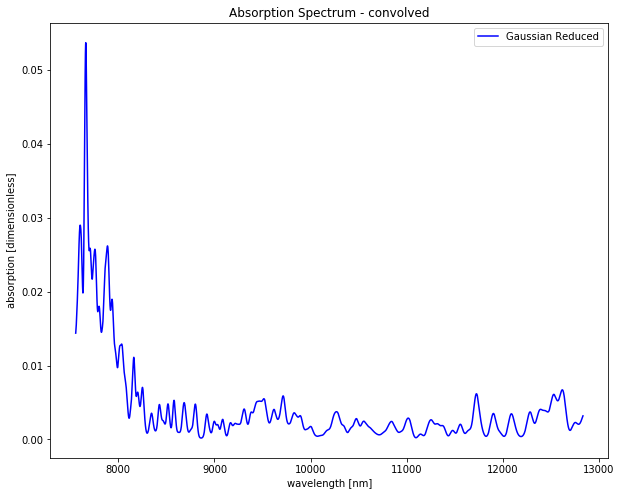

In [47]:
fig = plt.subplots(figsize=(10,8))
#plt.plot(10000000/nu10000, absorp10000, color='red', alpha=0.5)
plt.plot(10000000/nu_, absorp_, color='blue')
plt.xlabel('wavelength [nm]')
plt.ylabel('absorption [dimensionless]')
plt.title('Absorption Spectrum - convolved')
plt.legend(['Gaussian Reduced'])
plt.show()

## Plotting

In [39]:
fetch('O3',3,1,3900,4050)


Data is fetched from http://hitran.org

BEGIN DOWNLOAD: O3
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
Header written to data/O3.header
END DOWNLOAD
                     Lines parsed: 5969
PROCESSED


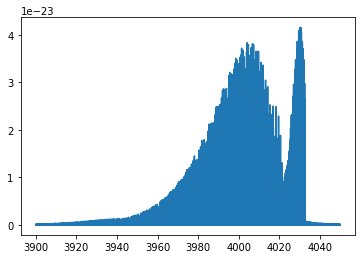

In [40]:
x,y =getStickXY('O3')
plt.plot(x,y)

(4020, 4035)

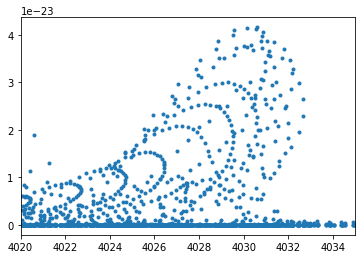

In [41]:
plt.plot(x,y,'.')
plt.xlim([4020,4035])

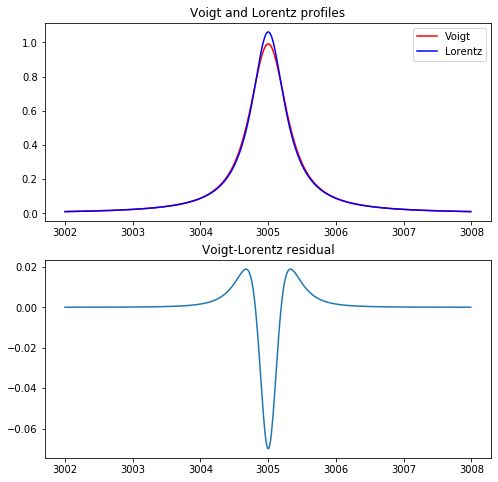

In [42]:
wn = np.arange(3002,3008,0.01)# get wavenumber range of interest
voi = PROFILE_VOIGT(3005,0.1,0.3,wn)[0]# calc Voigt
lor =PROFILE_LORENTZ(3005,0.3,wn)# calc Lorentz
diff = voi-lor  # calc difference
fig = plt.subplots(figsize=(8,8))
plt.subplot(2,1,1)# upper panel
plt.plot(wn,voi,'red',wn,lor,'blue')# plot both profiles
plt.legend(['Voigt','Lorentz'])# show legend
plt.title('Voigt and Lorentz profiles')# show title
plt.subplot(2,1,2)# lower panel
plt.plot(wn,diff)# plot difference
plt.title('Voigt-Lorentz residual')# show title
plt.show()

{'self': 1.0}
{'self': 1.0}
{'self': 1.0}
{'self': 1.0}


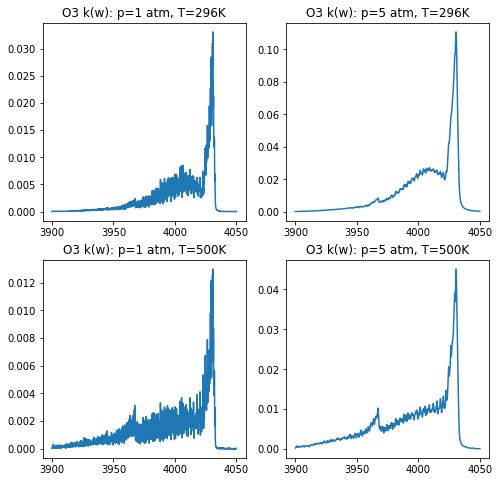

In [43]:
nu1,coef1 = absorptionCoefficient_Voigt(((3,1),),'O3',
                                        OmegaStep=0.01,HITRAN_units=False,GammaL='gamma_self',
                                        Environment={'p':1,'T':296.})
nu2,coef2 =absorptionCoefficient_Voigt(((3,1),),'O3',
                                       OmegaStep=0.01,HITRAN_units=False,GammaL='gamma_self',
                                       Environment={'p':5,'T':296.})
nu3,coef3 =absorptionCoefficient_Voigt(((3,1),),'O3',
                                       OmegaStep=0.01,HITRAN_units=False,GammaL='gamma_self',
                                       Environment={'p':1,'T':500.})
nu4,coef4 =absorptionCoefficient_Voigt(((3,1),),'O3',
                                       OmegaStep=0.01,HITRAN_units=False,GammaL='gamma_self',
                                       Environment={'p':5,'T':500.})
fig = plt.subplots(figsize=(8,8))
plt.subplot(2,2,1); plt.plot(nu1,coef1); plt.title('O3 k(w): p=1 atm, T=296K')
plt.subplot(2,2,2); plt.plot(nu2,coef2); plt.title('O3 k(w): p=5 atm, T=296K')
plt.subplot(2,2,3); plt.plot(nu3,coef3); plt.title('O3 k(w): p=1 atm, T=500K')
plt.subplot(2,2,4); plt.plot(nu4,coef4); plt.title('O3 k(w): p=5 atm, T=500K')
plt.show()

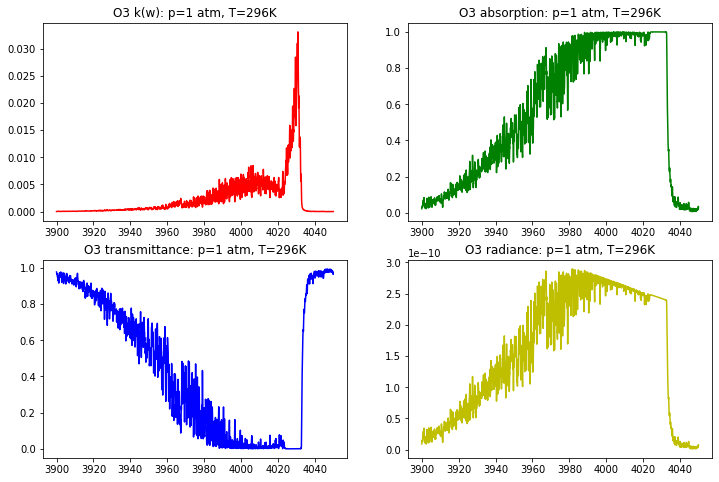

In [44]:
# -- Calculate and plot absorption, transmittance,and radiance spectra for 1 atm and 296K.  Path length is set to 10 m
nu,absorp = absorptionSpectrum(nu1,coef1,Environment={'l':1000.})
nu,transm = transmittanceSpectrum(nu1,coef1,Environment={'l':1000.})
nu,radian = radianceSpectrum(nu1,coef1,Environment={'l':1000.,'T':296.})

fig = plt.subplots(figsize=(12,8))
plt.subplot(2,2,1);plt.plot(nu1,coef1,'r');plt.title('O3 k(w): p=1 atm, T=296K')
plt.subplot(2,2,2);plt.plot(nu,absorp,'g');plt.title('O3 absorption: p=1 atm, T=296K')
plt.subplot(2,2,3);plt.plot(nu,transm,'b');plt.title('O3 transmittance: p=1 atm, T=296K')
plt.subplot(2,2,4);plt.plot(nu,radian,'y');plt.title('O3 radiance: p=1 atm, T=296K')
plt.show()

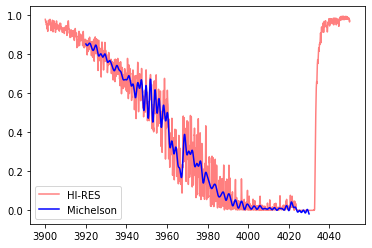

In [45]:
# -- compare with lower res. spectyrum convoluted with Michelson interferometer
nu_,trans_,i1,i2,slit = convolveSpectrum(nu,transm,SlitFunction=SLIT_MICHELSON,Resolution=2.0,AF_wing=20.)

plt.plot(nu,transm,'red',alpha=0.5)
plt.plot(nu_,trans_,'blue')
plt.legend(['HI-RES','Michelson'])
plt.show()

# BlackBody Modeling

In [46]:
!pip install astropy

In [47]:
import warnings
from astropy.modeling import models
from astropy import units as u
with warnings.catch_warnings():
    warnings.simplefilter('ignore')  # Ignore deprecation warning
    bb = models.BlackBody1D()
    bb(6000 * u.AA)  

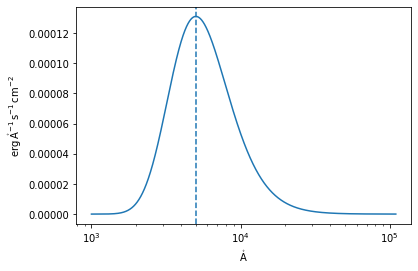

In [48]:
# Ignore warnings about deprecation of BlackBody1D
import warnings
warnings.simplefilter('ignore')

import numpy as np
import matplotlib.pyplot as plt

from astropy.modeling.models import BlackBody1D
from astropy.modeling.blackbody import FLAM
from astropy import units as u
from astropy.visualization import quantity_support

bb = BlackBody1D(temperature=5778*u.K)
wav = np.arange(1000, 110000) * u.AA
flux = bb(wav).to(FLAM, u.spectral_density(wav))

with quantity_support():
    plt.figure()
    plt.semilogx(wav, flux)
    plt.axvline(bb.lambda_max.to(u.AA).value, ls='--')
    plt.show()

True model values
  T1 = 5000.00
  T2 = 8000.00
Parameters of best-fitting model:
  T1 = 7932.53 +/- 102.35
  T2 = 5192.46 +/- 451.14
98 dof
chi squared 78.29
nchi2 0.80


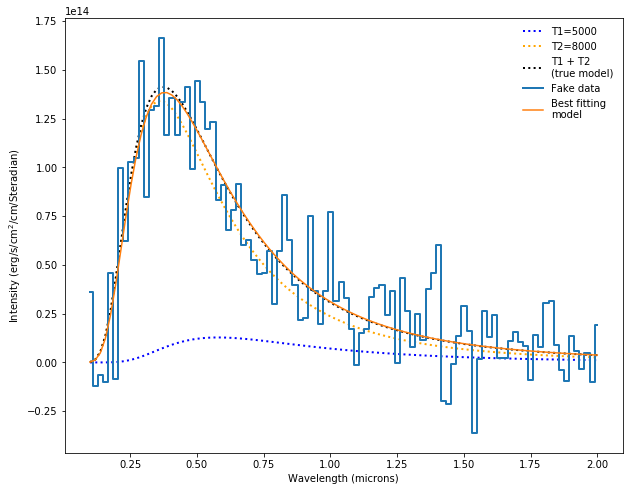

In [49]:
from scipy.optimize import curve_fit
import pylab as plt
import numpy as np

def blackbody_lam(lam, T):
    """ Blackbody as a function of wavelength (um) and temperature (K).

    returns units of erg/s/cm^2/cm/Steradian
    """
    from scipy.constants import h,k,c
    lam = 1e-6 * lam # convert to metres
    return 2*h*c**2 / (lam**5 * (np.exp(h*c / (lam*k*T)) - 1))

wa = np.linspace(0.1, 2, 100)   # wavelengths in um
T1 = 5000.
T2 = 8000.
y1 = blackbody_lam(wa, T1)
y2 = blackbody_lam(wa, T2)
ytot = y1 + y2

np.random.seed(1)

# make synthetic data with Gaussian errors

sigma = np.ones(len(wa)) * 1 * np.median(ytot)
ydata = ytot + np.random.randn(len(wa)) * sigma

# plot the input model and synthetic data

plt.figure(figsize=(10,8))
plt.plot(wa, y1, ':', lw=2, color='blue', label='T1=%.0f' % T1)
plt.plot(wa, y2, ':', lw=2, color='orange', label='T2=%.0f' % T2)
plt.plot(wa, ytot, ':', lw=2, color='black', label='T1 + T2\n(true model)')
plt.plot(wa, ydata, ls='steps-mid', lw=2, label='Fake data')
plt.xlabel('Wavelength (microns)')
plt.ylabel('Intensity (erg/s/cm$^2$/cm/Steradian)')

# fit two blackbodies to the synthetic data

def func(wa, T1, T2):
    return blackbody_lam(wa, T1) + blackbody_lam(wa, T2)

# Note the initial guess values for T1 and T2 (p0 keyword below). They
# are quite different to the known true values, but not *too*
# different. If these are too far away from the solution curve_fit()
# will not be able to find a solution. This is not a Python-specific
# problem, it is true for almost every fitting algorithm for
# non-linear models. The initial guess is important!

popt, pcov = curve_fit(func, wa, ydata, p0=(1000, 3000), sigma=sigma)

# get the best fitting parameter values and their 1 sigma errors
# (assuming the parameters aren't strongly correlated).

bestT1, bestT2 = popt
sigmaT1, sigmaT2 = np.sqrt(np.diag(pcov))

ybest = blackbody_lam(wa, bestT1) + blackbody_lam(wa, bestT2)

print('True model values')
print('  T1 = %.2f' % T1)
print('  T2 = %.2f' % T2)

print('Parameters of best-fitting model:')
print('  T1 = %.2f +/- %.2f' % (bestT1, sigmaT1))
print('  T2 = %.2f +/- %.2f' % (bestT2, sigmaT2))

degrees_of_freedom = len(wa) - 2
resid = (ydata - func(wa, *popt)) / sigma
chisq = np.dot(resid, resid)

print(degrees_of_freedom, 'dof')
print('chi squared %.2f' % chisq)
print('nchi2 %.2f' % (chisq / degrees_of_freedom))

# plot the solution
plt.plot(wa, ybest, label='Best fitting\nmodel')
plt.legend(frameon=False)
#plt.savefig('fit_bb.png')
plt.show()